# Fysikklab TFY4106 og TFY4125 våren 2023.

Denne notebooken genererer en berg-og-dal-bane basert på koordinatene til åtte festepunkter med tildels 
tilfeldig valgte høyder. Baneformen $y(x)$ beregnes med funksjonen __CubicSpline__ fra interpolate-biblioteket i SciPy. En naturlig kubisk spline $S$ består av ulike tredjegradspolynomer på deler av et intervall $[a,b]$, slik at $S$, $S' = dS/dx$ og $S'' = d^2S/dx^2$ er kontinuerlige på hele intervallet, og $S''(a) = S''(b) = 0$.    

Dere skal deretter studere bevegelsen til ei lita kule som ruller på den genererte banen $y(x)$.
Dette blir temmelig enkelt ettersom kulas mekaniske energi (dvs summen av kinetisk og potensiell energi) er bevart 
når den ruller rent (dvs uten å gli). 

Skruehøydene genereres innenfor visse rammer som sørger for at 
<li> kula kommer seg gjennom hele banen, </li> 
<li> banen hele veien har så liten helningsvinkel at kula ikke glir, </li>
<li> banen faktisk er en berg-og-dal-bane, med både berg (bakketopp) og dal (bunnpunkt) underveis. </li>
    
Det holder å kjøre dette programmet en gang for å oppnå en tilfredsstillende bane.
Når dere har gjort dette, er det viktig at dere skriver ned koordinatene til festepunktene! 
Disse blir generert på nytt hver gang koden blir kjørt. Husk at dere skal sette opp banen fysisk på neste labøkt. Derfor er det viktig å notere nødvendig informasjon.
    

Vi begynner med å importere noen nyttige bibliotek:

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

Vi lager en (numpy-) array som inneholder x-koordinatene til festepunktene. 
Horisontal avstand mellom festepunktene er 200 mm.

In [46]:
h = 200
xfast=np.asarray([0,1,2,3,4,5,6,7])*h

Vi setter startposisjon xmin, sluttposisjon xmax og steglengde dx = 1 mm 
i x-retning. Deretter lager vi en array x med x-verdier fra 0 til 1400,
dvs for hver mm fra xmin til xmax. Funksjonen arange returnerer verdier på det halvåpne intervallet [xmin,xmax), dvs slik at xmin er med mens xmax ikke er med. Her blir dermed x[0]=xmin=0, x[1]=xmin+1*dx=1, ..., x[1400]=xmax-dx=1400, dvs x blir en tabell med 1401 elementer

In [47]:
xmin = 0
xmax = 1401
dx = 1
x = np.arange(xmin,xmax,dx)

Vi lager deretter en array med høydekoordinatene til festepunktene. 
De "tilfeldige" høydeendringene fra skrue til skrue sørger for at banens
starthøyde (300 mm) er banens høyeste punkt, og at den deretter går via
en dal og en bakketopp, og noen ganger en ny dal før siste skrue.

In [48]:
#Skruehøyder:
yfast = np.zeros(8)
yfast[0] = 300
yfast[1] = 249
yfast[2] = 169
yfast[3] = 146
yfast[4] = 189
yfast[5] = 195
yfast[6] = 154
yfast[7] = 191

Programmet beregner i neste omgang 7 tredjegradspolynomer, et for hvert intervall mellom to nabofestepunkter (naboskruer), med scipy.interpolate-funksjonen CubicSpline:

In [49]:
cs = CubicSpline(xfast,yfast,bc_type='natural')

Funksjonen cs kan nå brukes til å regne ut $y(x)$, $y'(x)$ og $y''(x)$ for en vilkårlig horisontal posisjon x, eller som her, for alle de 1401 horisontale
posisjonene lagret i tabellen x. Funksjonen cs fungerer slik: <br>
cs(x)   tilsvarer $y(x)$ <br>
cs(x,1) tilsvarer $y'(x)$ <br>
cs(x,2) tilsvarer $y''(x)$ <br>

In [50]:
y = cs(x)
dy = cs(x,1)
d2y = cs(x,2)

Nå kan vi plotte baneformen $y(x)$

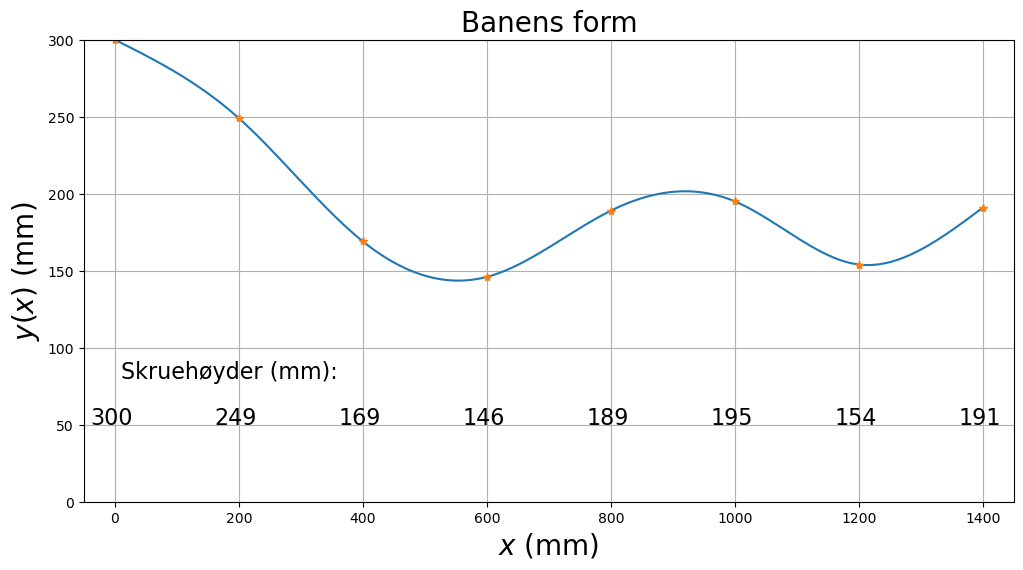

In [51]:
baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x,y,xfast,yfast,'*')
plt.title('Banens form', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$y(x)$ (mm)',fontsize=20)
plt.text(10,80,'Skruehøyder (mm):', fontsize=16)
plt.text(-40, 50, int(yfast[0]), fontsize=16)
plt.text(160, 50, int(yfast[1]), fontsize=16)
plt.text(360, 50, int(yfast[2]), fontsize=16)
plt.text(560, 50, int(yfast[3]), fontsize=16)
plt.text(760, 50, int(yfast[4]), fontsize=16)
plt.text(960, 50, int(yfast[5]), fontsize=16)
plt.text(1160, 50, int(yfast[6]), fontsize=16)
plt.text(1360, 50, int(yfast[7]), fontsize=16)
plt.ylim(0,300)
plt.xlim(-50,1450)
plt.grid()
plt.show()
#Ta bort # hvis du ønsker å lagre grafen som pdf og/eller png.
#baneform.savefig("baneform.pdf", bbox_inches='tight')
#baneform.savefig("baneform.png", bbox_inches='tight')

La oss til slutt foreta noen beregninger basert på banens form og skrive ut
noen størrelser, som en kontroll på at banen tilfredsstiller kriteriene som nevnes ovenfor. Du finner selv ut hva de beregnede størrelsene representerer.

In [52]:
y37 = y[400:1400]
y27 = y[200:1400]
y37min = np.min(y37)
y37max = np.max(y37)
y27min = np.min(y27)
y27max = np.max(y27)
K = d2y/(1+dy**2)**(1.5)
R = 1/(np.abs(K)+1E-8)  #unngår R = uendelig
Rmin = np.min(R)
beta = np.arctan(dy)
betadeg = beta*180/np.pi
startvinkel = betadeg[0]
maksvinkel = np.max(np.abs(betadeg))

print('Høyeste punkt etter 3.skrue (mm): %4.0f' %y37max)
print('Laveste punkt etter 2.skrue (mm): %4.0f' %y27min)
print('Starthelningsvinkel (grader): %4.1f' %startvinkel)
print('Maksimal helningsvinkel (grader): %4.1f' %maksvinkel)
print('Minste krumningsradius (mm): %4.0f' %Rmin)
print('Festepunkthøyder (mm):', yfast)

Høyeste punkt etter 3.skrue (mm):  202
Laveste punkt etter 2.skrue (mm):  144
Starthelningsvinkel (grader): -11.4
Maksimal helningsvinkel (grader): 23.3
Minste krumningsradius (mm):  287
Festepunkthøyder (mm): [300. 249. 169. 146. 189. 195. 154. 191.]


In [53]:
g = 9810

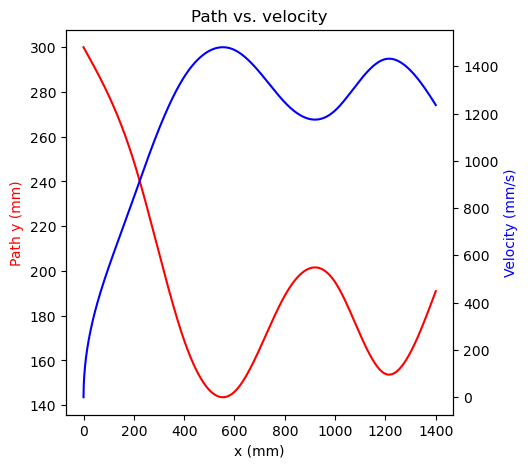

In [54]:
vel = [np.sqrt(10/7 * g * (y[0] - y[x])) for x in range(len(y))] # Divide by 1000 to get m, not mm

fig, ax1 = plt.subplots(figsize=(5, 5))
ax1.set_xlabel("x (mm)")
ax2 = ax1.twinx()

ax1.plot(x, y, color="red")
ax2.plot(x, vel, color="blue")

ax1.set_ylabel("Path y (mm)", color="red")
ax2.set_ylabel("Velocity (mm/s)", color="blue")
plt.title("Path vs. velocity")
fig.savefig("path_vs_vel.png", bbox_inches='tight')

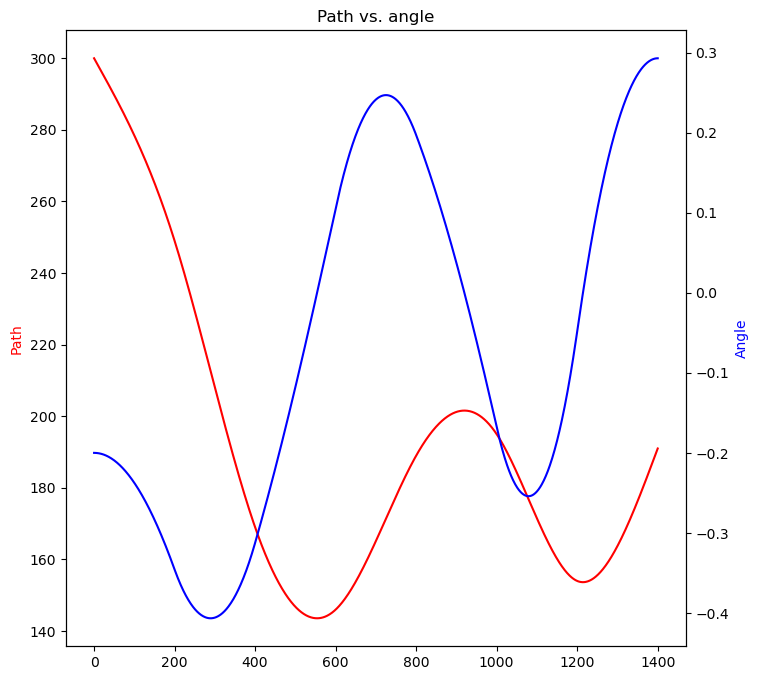

In [55]:
beta = [np.arctan(x) for x in dy]

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(x, y, color="red")
ax2.plot(x, beta, color="blue")

ax1.set_ylabel("Path", color="red")
ax2.set_ylabel("Angle", color="blue")
plt.title("Path vs. angle");

In [56]:
x_vel = [v * np.cos(b) for v, b in zip(vel, beta)]

In [57]:
x_avg_vel = [(x_vel[i-1] + x_vel[i])/2 for i in range(1, len(x_vel))]

In [58]:
delta_t = [1/x for x in x_avg_vel]

In [59]:
time = np.cumsum(delta_t)

In [60]:
time

array([0.03830257, 0.05416794, 0.06634175, ..., 1.48886462, 1.48970796,
       1.49055246])

In [61]:
time = np.insert(time, 0, 0, axis=0)

In [62]:
time

array([0.        , 0.03830257, 0.05416794, ..., 1.48886462, 1.48970796,
       1.49055246])

In [63]:
curvature = d2y / np.power((1 + np.power(dy, 2)), 3/2)

In [64]:
curvature

array([-2.04151533e-19, -7.40991487e-06, -1.48197276e-05, ...,
        3.06876998e-05,  1.53435162e-05,  7.61205463e-19])

In [65]:
sentripetal_acceleration = np.multiply(np.power(np.array(vel), 2), curvature)

In [66]:
M = 0.0305
c = 2/5

normal_force = M * (g * np.cos(np.array(beta)) + sentripetal_acceleration)

In [67]:
path_acceleration = - (5*g*np.sin(np.array(beta))/7)

In [68]:
friction = c / (1+c) * M*g*np.sin(np.array(beta))

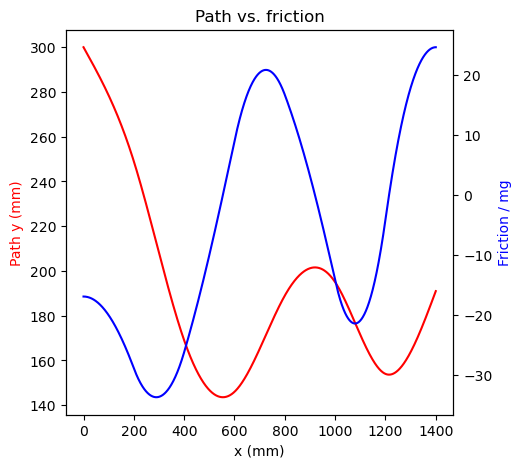

In [69]:
fig, ax1 = plt.subplots(figsize=(5, 5))
ax1.set_xlabel("x (mm)")
ax2 = ax1.twinx()

ax1.plot(x, y, color="red")
ax2.plot(x, friction, color="blue")

ax1.set_ylabel("Path y (mm)", color="red")
ax2.set_ylabel("Friction / mg", color="blue")
plt.title("Path vs. friction")
fig.savefig("path_vs_f.png", bbox_inches='tight')

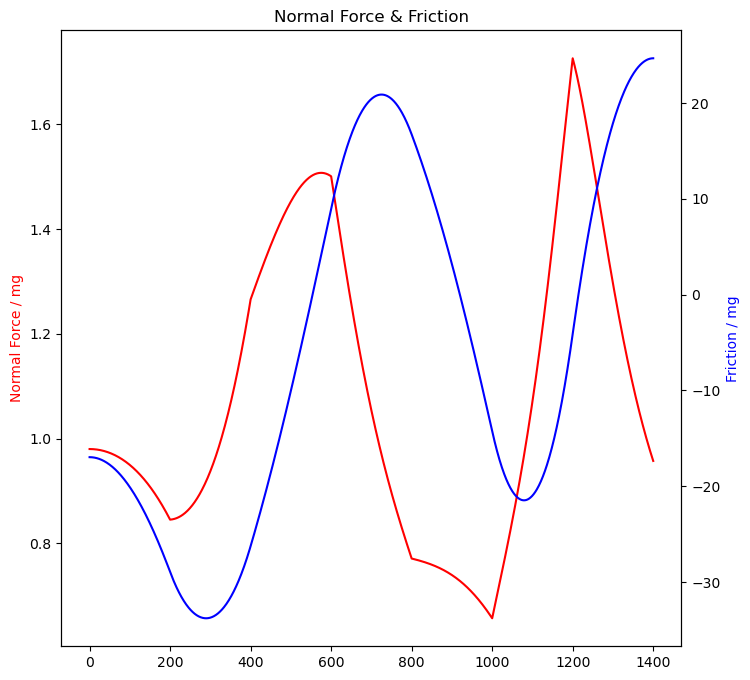

In [70]:
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(x, normal_force / (M*g), color="red")
ax2.plot(x, friction, color="blue")

ax1.set_ylabel("Normal Force / mg", color="red")
ax2.set_ylabel("Friction / mg", color="blue")
plt.title("Normal Force & Friction");
fig.savefig("normal_force_friction.png", bbox_inches='tight');

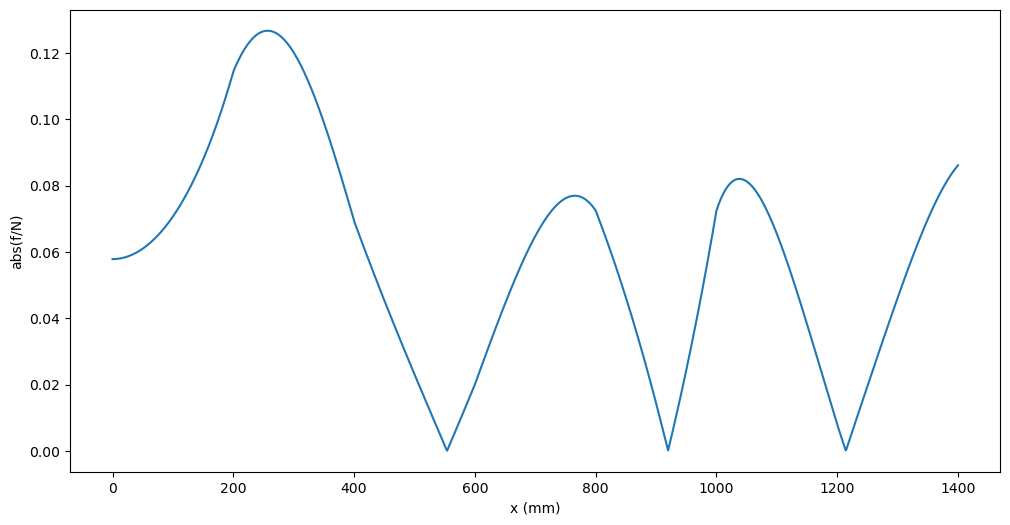

In [71]:
fig = plt.figure('y(x)',figsize=(12,6))
plt.plot(x, np.abs(friction / normal_force))
plt.title("")
plt.ylabel("abs(f/N)")
plt.xlabel("x (mm)")
fig.savefig("ratio_forces.png", bbox_inches='tight');

# (4) End velocity in experiment

In [83]:
import math

def get_scaled_x_y_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        second_last_line = lines[-2].strip()
        last_line = lines[-1].strip()
        lines = [line.strip() for line in lines[2:]]
        fx = list(map(float, lines[2].split(';')))[1]
        lx = list(map(float, lines[-1].split(';')))[1]
        fy = list(map(float, lines[2].split(';')))[2]
        ly = list(map(float, lines[-1].split(';')))[2]
        scale_x = abs((lx-fx)/1400)
        scale_y = abs((ly-fy)/109)
        t = list(map(float, [line.split(";")[0] for line in lines]))
        x = list(map(float, [line.split(";")[1] for line in lines]))
        y = list(map(float, [line.split(";")[2] for line in lines]))
        t = np.array(t)
        x = np.array(x) / scale_x
        y = np.array(y) / scale_y
    return t, x, y, scale_x, scale_y

def get_values_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        second_last_line = lines[-2].strip()
        last_line = lines[-1].strip()
        fx = list(map(float, lines[2].split(';')))[1]
        lx = list(map(float, lines[-1].split(';')))[1]
        fy = list(map(float, lines[2].split(';')))[2]
        ly = list(map(float, lines[-1].split(';')))[2]
        scale_x = (lx-fx)/1400
        scale_y = (ly-fy)/109

    second_last_words = list(map(float, second_last_line.split(";")))
    last_words = list(map(float, last_line.split(";")))

    second_last_time = second_last_words[0]
    second_last_x = (second_last_words[1] - fx)/scale_x
    second_last_y = (second_last_words[2] - fy)/scale_y

    last_time = last_words[0]
    last_x = (last_words[1] - fx)/scale_x
    last_y = (last_words[2] - fy)/scale_y

    return second_last_time, second_last_x, second_last_y, last_time, last_x, last_y


def get_roll_time_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        first_time = float(lines[2].strip().split(";")[0])
        last_time = float(lines[-1].strip().split(";")[0])
    return last_time - first_time

def get_end_velocity(file_path):
    time_before, x_before, y_before, time_after, x_after, y_after = get_values_from_file(
        file_path)
    return math.sqrt((x_after-x_before)**2+(y_after-y_before)**2) / (time_after - time_before)


In [84]:
roll_times = np.zeros(10)
for i in range(1, 11):
    roll_time = get_roll_time_from_file(f'kule_{ i }_data.txt')
    print(f"Roll_time_{i}: {roll_time} s")
    roll_times[i-1] = roll_time

print(f'Mean roll time: {np.mean(roll_times)} s')
print(f'SD: {np.std(roll_times)} s')
print(f'SE: {np.std(roll_times)/np.sqrt(10)} s')

Roll_time_1: 1.533 s
Roll_time_2: 1.534 s
Roll_time_3: 1.6 s
Roll_time_4: 1.567 s
Roll_time_5: 1.6 s
Roll_time_6: 1.567 s
Roll_time_7: 1.6 s
Roll_time_8: 1.5 s
Roll_time_9: 1.533 s
Roll_time_10: 1.5 s
Mean roll time: 1.5534 s
SD: 0.03714350548884694 s
SE: 0.011745807762772226 s


In [85]:
end_vels = np.zeros(10)
for i in range(1, 11):
    end_vel = get_end_velocity(f'kule_{ i }_data.txt')
    print(f"End_velocity_{i}: {end_vel} mm/s")
    end_vels[i-1] = end_vel

print(f'Mean end velocity: {np.mean(end_vels)} mm/s')
print(f'SD: {np.std(end_vels)} mm/s')
print(f'SE: {np.std(end_vels)/np.sqrt(10)} mm/s')

End_velocity_1: 1071.3857092541084 mm/s
End_velocity_2: 1135.609817419773 mm/s
End_velocity_3: 1200.2393107434168 mm/s
End_velocity_4: 1055.5436214734964 mm/s
End_velocity_5: 996.3224873531095 mm/s
End_velocity_6: 1145.9948748869128 mm/s
End_velocity_7: 1005.9513013265135 mm/s
End_velocity_8: 1227.3276259131947 mm/s
End_velocity_9: 1088.2435838259682 mm/s
End_velocity_10: 1195.5846572399325 mm/s
Mean end velocity: 1112.2202989436425 mm/s
SD: 77.33979951302894 mm/s
SE: 24.45699202419527 mm/s


# End value of the ball's total kinetic energy, K

In [86]:
m = 0.0305
c = 2/5

In [87]:
Ks = np.zeros(10)
for i in range(1,11):
    K = (1+c)/2 * m * (get_end_velocity(f"kule_{i}_data.txt")/1000)**2
    Ks[i-1] = K
    print(f"Total_Kinetic_Energy_{i}: " + str(K) + " J")

print(f'Mean end velocity: {np.mean(Ks)} mm/s')
print(f'SD: {np.std(Ks)} mm/s')
print(f'SE: {np.std(Ks)/np.sqrt(10)} mm/s')

Total_Kinetic_Energy_1: 0.024506967666170377 J
Total_Kinetic_Energy_2: 0.027533166185920634 J
Total_Kinetic_Energy_3: 0.030756263505199315 J
Total_Kinetic_Energy_4: 0.02378757939139274 J
Total_Kinetic_Energy_5: 0.021193258949497147 J
Total_Kinetic_Energy_6: 0.028039045807251965 J
Total_Kinetic_Energy_7: 0.0216048767406748 J
Total_Kinetic_Energy_8: 0.032160211713389494 J
Total_Kinetic_Energy_9: 0.025284251986714565 J
Total_Kinetic_Energy_10: 0.030518174060597692 J
Mean end velocity: 0.026538379600680877 mm/s
SD: 0.003669496448410635 mm/s
SE: 0.001160396664287616 mm/s


# Lost mecanic energy, delta E

In [88]:
DEs = np.zeros(10)
for i in range(1,11):
    _, _, _, _, _, y_after = get_values_from_file(f"kule_{i}_data.txt")
    delta_e = m*(g/1000*(300-y_after)/1000-0.5*(get_end_velocity(f"kule_{i}_data.txt")/1000)**2)
    DEs[i-1] = delta_e
    print(f"Delta_E_{i}:  - { delta_e } J")


Delta_E_1:  - 0.03964317809559259 J
Delta_E_2:  - 0.0374816077243424 J
Delta_E_3:  - 0.03517939535342906 J
Delta_E_4:  - 0.040157026863290896 J
Delta_E_5:  - 0.04201011289321632 J
Delta_E_6:  - 0.03712026513767717 J
Delta_E_7:  - 0.04171610018523228 J
Delta_E_8:  - 0.03417657520472179 J
Delta_E_9:  - 0.039087975009489594 J
Delta_E_10:  - 0.035349459242430215 J


In [89]:
print(f'Mean lost mechanic energy: {np.mean(DEs)}')
print(f'SD: {np.std(DEs)}')
print(f'SE: {np.std(DEs)/np.sqrt(10)}')

Mean lost mechanic energy: 0.03819216957094223
SD: 0.0026210688917218824
SE: 0.0008288547602054401


In [90]:
total_mech_e = m*g*(0.3)
print(np.mean(DEs) / total_mech_e * 100)


0.04254849748605163


In [222]:
num_t, num_x, num_y, sx, sy = get_scaled_x_y_from_file("kule_1_data.txt")

In [230]:
num_vel = [math.sqrt((num_x[i+1]-num_x[i])**2+(num_y[i+1]-num_y[i])**2) / (num_t[i+1] - num_t[i]) for i in range(len(num_t)-1)]

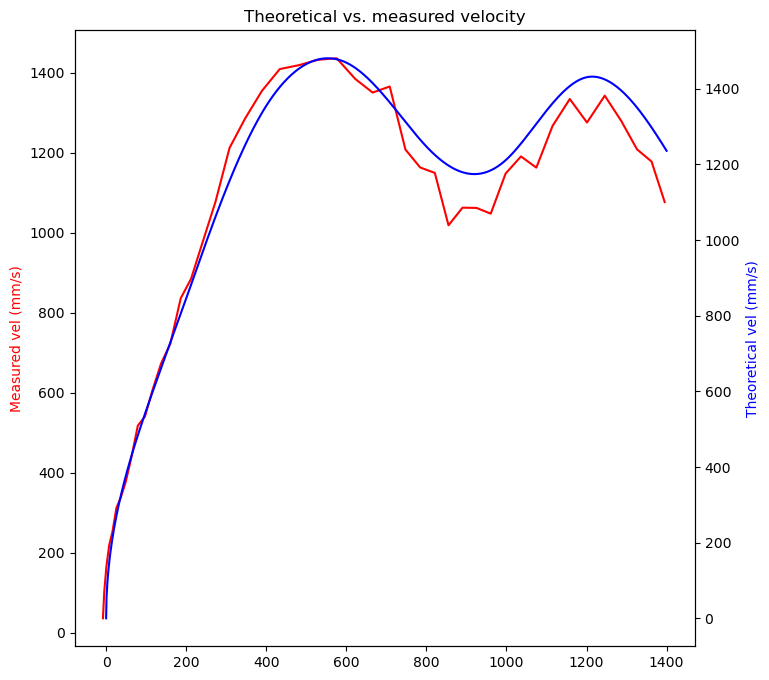

In [259]:
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(num_x[1::], num_vel, color="red")
ax2.plot(x, vel, color="blue")

ax1.set_ylabel("Measured vel (mm/s)", color="red")
ax2.set_ylabel("Theoretical vel (mm/s)", color="blue")
plt.title("Theoretical vs. measured velocity")
fig.savefig("velocity.png", bbox_inches='tight');

In [184]:
x_diff = xfast[0] - num_x[0]
y_diff = yfast[0] - num_y[0]
print(x_diff, y_diff)

9.041730833561873 -33.2574074074073


In [185]:
num_x += x_diff
num_y += y_diff

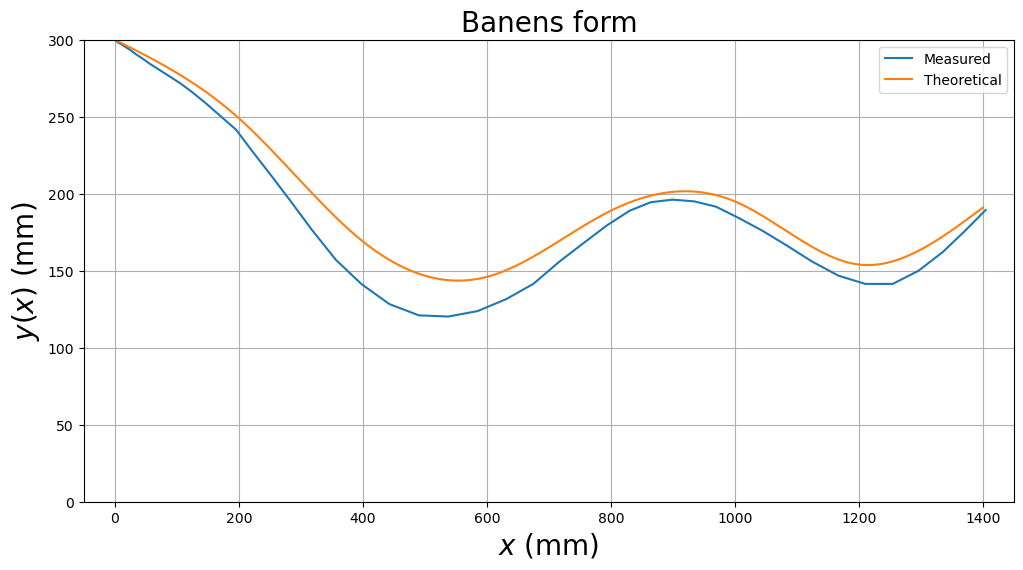

In [192]:
baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(num_x, num_y, x, y)
plt.title('Banens form', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$y(x)$ (mm)',fontsize=20)
plt.legend(["Measured", "Theoretical"])
plt.ylim(0,300)
plt.xlim(-50,1450)
plt.grid()
plt.show()
baneform.savefig("measured_baneform.png", bbox_inches='tight')

In [ ]:
# Mean end velocity

In [77]:
end_vels = np.zeros(10)
for i in range(1, 11):
    e_v = get_end_velocity(f'kule_{ i }_data.txt')
    end_vels[i-1] = e_v
print(f'Mean end velocity: {np.mean(end_vels)}')
print(f'SE: {np.std(end_vels)/np.sqrt(10)}')

Mean end velocity: 1112.2202989436425
SE: 24.45699202419527
